# Project: Investigate a Dataset (tmdb-movies)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
####**TMDb-movies dataset**:
This data set contains information
about 10,000 movies collected from
The Movie Database (TMDb),
including user ratings and revenue.
<br/>
After exploring this dataset I have some questions I want to explore as:<br/>
1-
2-which are the top 10 movies of the highest revenu?<br/>
3-who are the top 3 directors whom their movies have the best rate(as average)?<br/>
4-Does the voting on movies have been changed over years?<br/>
5- which the most genre is popular among the users?<br/>







In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties
- the data has 10866 rows and 21 columns
- the data contain 13434 Nan values and only 1 duplicated value so we need to delete duplicates and replace Nan with zero value.
- from showing the columns names it seems the there are some of the unusable ones and better to be removed.
- the statistical summary shows that there is a big change in some columns'data over the years as runtime, vote_count.

In [2]:
#reading the csv file as pandas datafrae
movies_data_original = pd.read_csv('tmdb-movies.csv')
#showing the first 5 rows of the df
movies_data_original.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#show no. of rows and columns
movies_data_original.shape

(10866, 21)

In [4]:
#show columns names
movies_data_original.columns

Index([u'id', u'imdb_id', u'popularity', u'budget', u'revenue',
       u'original_title', u'cast', u'homepage', u'director', u'tagline',
       u'keywords', u'overview', u'runtime', u'genres',
       u'production_companies', u'release_date', u'vote_count',
       u'vote_average', u'release_year', u'budget_adj', u'revenue_adj'],
      dtype='object')

In [5]:
movies_data_original.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [6]:
movies_data_original.isnull().sum().sum()

13434

In [7]:
#shoe a statistical summary of the numerical columns
movies_data_original.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [8]:
movies_data_original.duplicated().sum()

1

### Data Cleaning (remove unusable values and fill the Nans)

In [9]:
# Delete the un-important columns then check the df
movies_data= movies_data_original.drop(columns=['imdb_id','cast','homepage','tagline', 'keywords','overview','budget_adj' ,'revenue_adj'])
movies_data.shape

(10866, 13)

In [10]:
#replace Nan values with Zeros then check df again
movies_data.fillna(0, inplace = True)
movies_data.isnull().sum().sum()

0

In [11]:
#remove duplicated rows
movies_data.drop_duplicates(inplace=True)

In [12]:
#replacing 0 with NaN of runtime column
movies_data['runtime'] =movies_data['runtime'].replace(0, np.NAN)

In [13]:
#create new column which contain the profit of each movie
movies_data['profit'] = movies_data['revenue'] - movies_data['budget']
movies_data[['revenue','budget','profit']].head()

,revenue,budget,profit
0,1513528810,150000000,1363528810
1,378436354,150000000,228436354
2,295238201,110000000,185238201
3,2068178225,200000000,1868178225
4,1506249360,190000000,1316249360


In [14]:
movies_data.profit.dtypes

dtype('int64')

In [15]:
movies_data = movies_data.dropna(axis=0)
movies_data.isnull().sum().sum()

0

<a id='eda'></a>
## Exploratory Data Analysis




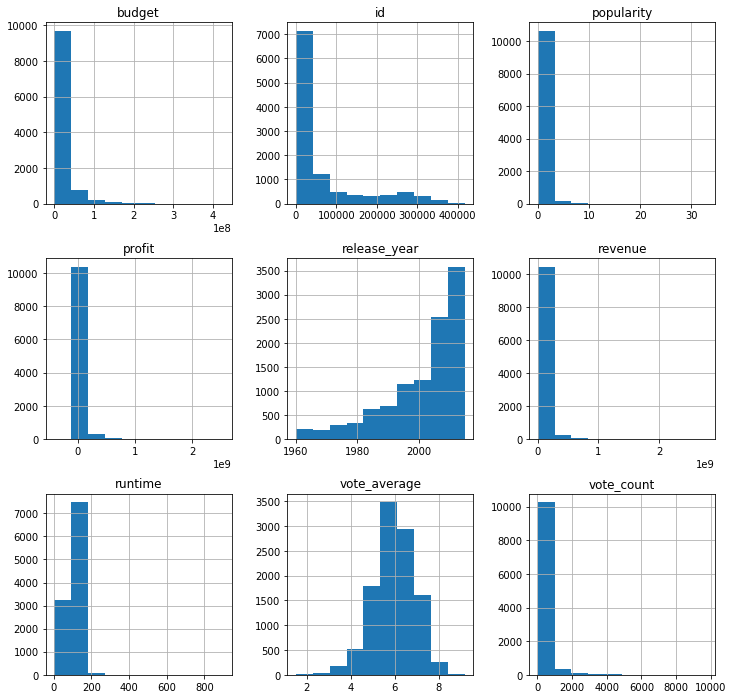

In [16]:
movies_data.hist(figsize=(12,12));

In [ ]:
#show the top 5 popular genres
genres_count.head()

In [ ]:
#plotting  the genres count 
genre_count.plot.barh(figsize=[8,8])
plt.yticks(fontsize=14)
plt.title = ''
plt.show();

### Research Question 2  (who are the directors of the most number of movies )

In [ ]:
movies_data['director'].value_counts().head(3)

So the director "Woody Allen" produced the highest no. of movies among the director.


In [ ]:
def stat_values(x) :
    print('Maximum value is: ',x.max())
    print('Average value is: ',x.mean())
    print('Minimum value is: ',x.min())


In [ ]:
woody_average_votes = movies_data[movies_data['director']=='Woody Allen']
woody_average_votes

In [ ]:
stat_values(woody_average_votes['vote_average'])

In [ ]:
#let's plot  this:
woody_average_votes['vote_average'].hist(figsize=(6,4));



In [ ]:
plt.scatter(data= movies_data , x = 'runtime',y = 'budget')
plt.xlabel='movies runtime' 
plt.ylabel= 'movies budgets'
plt.title = 'movies and budget relation'
plt.show();

From the plot it seems that the  most popular runtime is between 100 to 200 minutes.

stat_values(movies_data['runtime'])

###Question 1) relation between popularity and average vote

In [ ]:
movies_data.plot(x='vote_average',y='popularity',kind='scatter')
plt.title('Vote Average vs Popularity')
plt.show();

In [ ]:
movies_data[['vote_average', 'popularity']].corr()

In [ ]:
movies_data.sort(by = 'profit' , ascending = False)
movies_data.head(10)[['runtime']]

### Research Question 3  (The most profitable movies)

In [ ]:
Top_profitable_movies = movies_data.sort_values(by=['profit'], ascending = False).head(10)[['original_title', 'profit', 'runtime']]
Top_profitable_movies


In [ ]:
profit_year_mean = movies_data.groupby('release_year')['profit'].mean()
# plot relationship between release_year and profit
profit_year_mean.plot(kind='line',color='green',title='Average Profit VS Years',figsize = (6,4))
plt.xlabel('Year')
plt.ylabel('Profit_yearly');

It seemd that from there is change of profit over years, not constant but there is an increase in the last year.

Voting count over year

In [ ]:
profit_year_mean = movies_data.groupby('release_year')['vote_count'].mean()

# plot relationship between release_year and profit
profit_year_mean.plot(kind='line',color='red',title='Average voting count VS Years',figsize = (6,4))
plt.xlabel('Year_change')
plt.ylabel('voting_yearly')

##**Ohoo** high increase in voting count over year thid detect that there is more interesting in movies and giving feedback.

The 5 top rated movies are :The Story of Film: An Odyssey,The Mask You Live In,
        Black Mirror: White Christmas, Life Cycles, Pink Floyd: Pulse

In [ ]:
stat_values(profit_year_mean)

<a id='conclusions'></a>
## Conclusions
>From TMBd movies analysis<br/>:
- The most popular Genres :Drama, Comedy, thriler, action<br/>
- The top directors produced movies are:<br/>
    >Woody Allen        45<br/>
    Clint Eastwood     34<br/>
    Martin Scorsese    29<br/>
-weak correlation between the runtime and budgets but the most opoular movies range from 100 to 200 of runtime.
   
- It seemd that from there is change of profit over years, not constant but there is an increase in the last year.
- highly increase in voting count over year thid detect that there is more interesting in movies and giving feedback.